In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from glob import glob
from src import train_to_implicit, implicit_to_species_aggregate
import pickle

%load_ext autoreload
%autoreload 2

In [3]:
train_data = pd.read_csv("./data/train_images.csv")
class_names =  np.load("./data/class_names.npy", allow_pickle=True)

In [4]:
subspecies = {v: k.split(".")[-1] for k, v in class_names.item().items()}
species = {vs: [k for k, v in subspecies.items() if vs in v] for vs in set([x.split("_")[-1] for x in subspecies.values()])}

In [6]:
species

{'Meadowlark': [88],
 'Oriole': [95, 96, 97, 98],
 'Tanager': [139, 140],
 'Redstart': [109],
 'Woodpecker': [187, 188, 189, 190, 191, 192],
 'Junco': [76],
 'Grackle': [49],
 'Tern': [141, 142, 143, 144, 145, 146, 147],
 'Cormorant': [23, 24, 25],
 'Starling': [134],
 'Sayornis': [103],
 'Flycatcher': [37, 38, 39, 40, 41, 42, 43],
 'Finch': [34, 35],
 'Albatross': [1, 2, 3],
 'Gadwall': [46],
 'Guillemot': [58],
 'Goldfinch': [47, 48],
 'Blackbird': [9, 10, 11, 12],
 'Bobolink': [13],
 'Nuthatch': [94],
 'Pewee': [102],
 'Pipit': [104],
 'Frigatebird': [44],
 'Auklet': [5, 6, 7, 8],
 'Fulmar': [45],
 'Grebe': [50, 51, 52, 53],
 'Gull': [59, 60, 61, 62, 63, 64, 65, 66],
 'Thrasher': [149, 150],
 'Chat': [20],
 'Mockingbird': [91],
 'Jay': [73, 74, 75],
 'Bunting': [14, 15, 16],
 'Pelican': [100, 101],
 'Wren': [193, 194, 195, 196, 197, 198, 199],
 'Towhee': [21, 148],
 'Loon': [86],
 'Jaeger': [71, 72],
 'Cardinal': [17],
 'Warbler': [158,
  159,
  160,
  161,
  162,
  163,
  164,
  16

In [52]:
sorted_bird_dict = dict(sorted(species.items(), key=lambda x: len(x[1])))
start_key = "Tern"
end_key = "Warbler"
sliced_bird_dict = {key: species[key] for key in species if start_key <= key <= end_key}

# Printing the sliced dictionary
print(sliced_bird_dict)

{'Towhee': [21, 148], 'Warbler': [158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182], 'Tern': [141, 142, 143, 144, 145, 146, 147], 'Vireo': [151, 152, 153, 154, 155, 156, 157], 'Thrasher': [149, 150], 'Violetear': [70]}


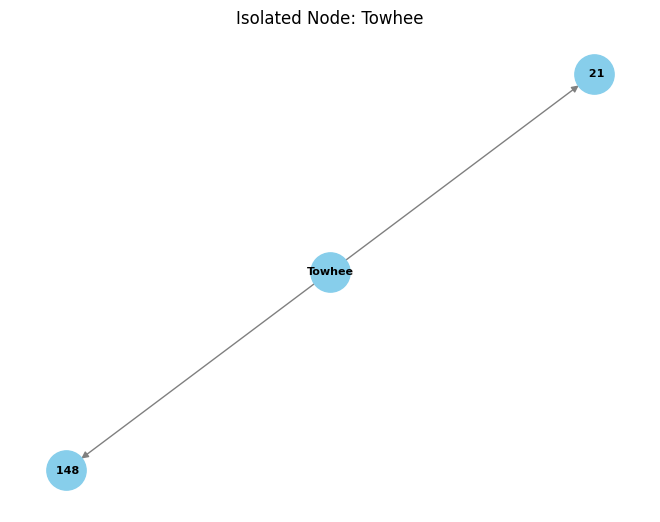

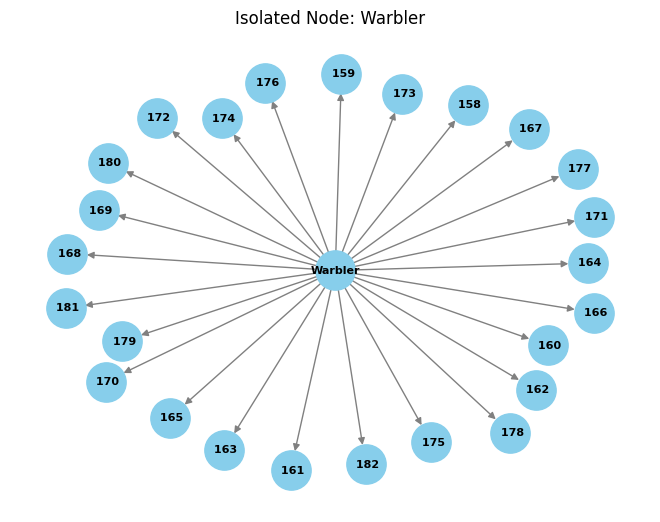

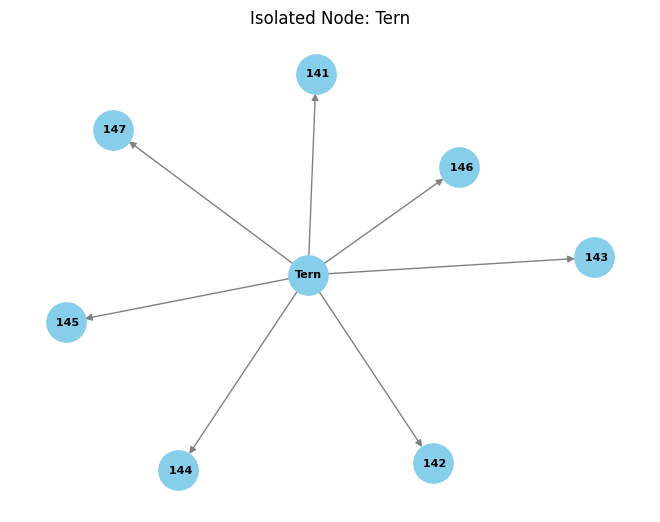

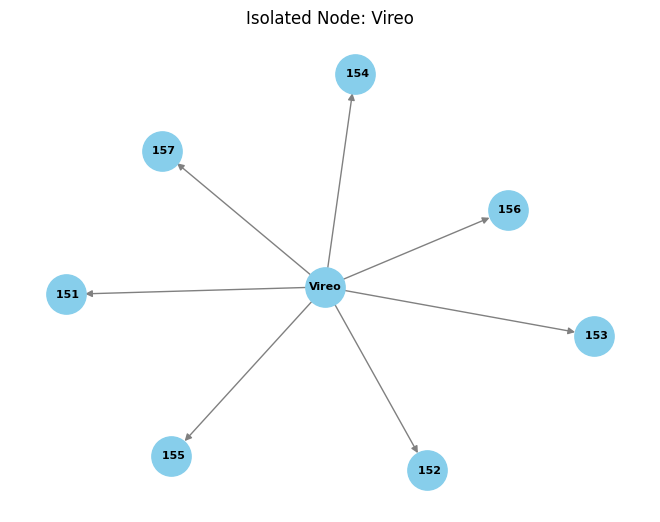

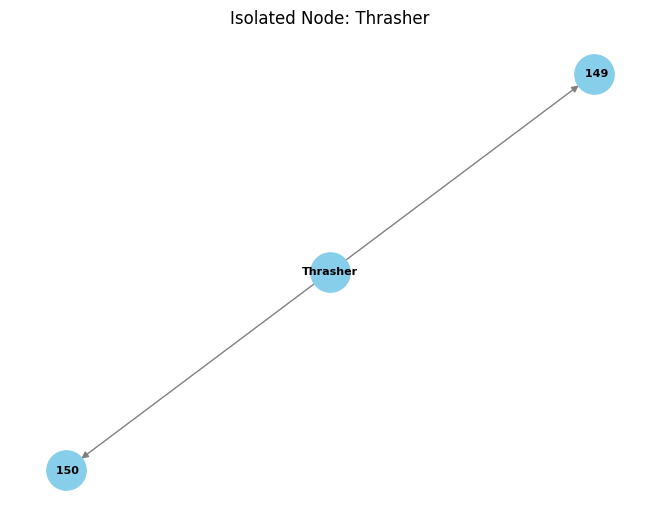

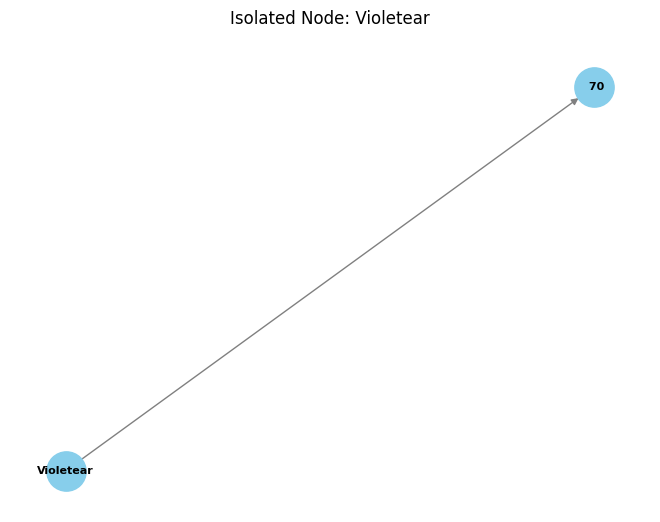

In [93]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

for species_x, relations in sliced_bird_dict.items():
    G.add_node(species_x)
    for relation in relations:
        G.add_edge(species_x, f' {relation}')

character_nodes = [node for node in G.nodes if not node.startswith(' ')]

# Isolate each node and visualize
for node in character_nodes:
    subgraph = G.subgraph([node] + list(G.neighbors(node)))
    pos = nx.spring_layout(subgraph, weight=5, scale=0.01)
    nx.draw(subgraph, pos, with_labels=True, font_weight='bold', node_size=800, node_color='skyblue', font_size=8, edge_color='gray')
    # Add a title with the current node's name
    plt.title(f'Isolated Node: {node}')
    # Show the plot for each isolated node
    plt.show()

## Get Class Distribution

C:\Users\antonio\AppData\Local\Temp\ipykernel_15848\3502851629.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(subspecies.values(), rotation=60)


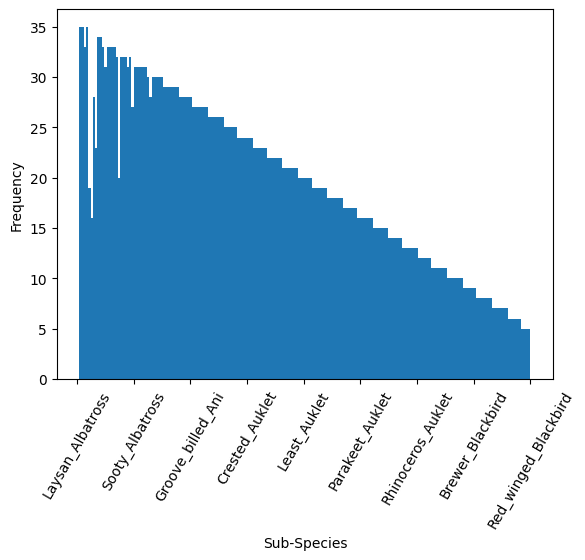

In [6]:
fig, ax = plt.subplots(1,1)
ax.hist(train_data.label, bins=len(subspecies))
ax.set_ylabel("Frequency")
ax.set_xlabel("Sub-Species")
ax.set_xticklabels(subspecies.values(), rotation=60)

plt.show()

## Check Image Properties

In [8]:
widths = []
heights = []

for img in glob("./data/train_images/train_images/**.jpg"):
    im = Image.open(img)
    widths.append(im.size[0])
    heights.append(im.size[1])

AVG_HEIGHT = round(sum(heights)/len(heights))
AVG_WIDTH = round(sum(widths)/len(widths))

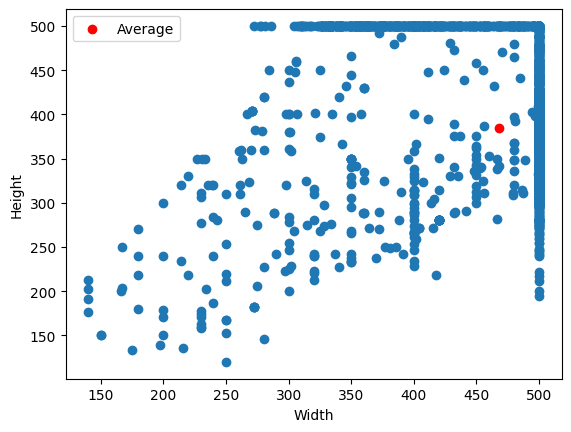

In [9]:
plt.scatter(widths, heights)
plt.scatter(AVG_WIDTH, AVG_HEIGHT, color="r", label="Average")
plt.xlabel("Width")
plt.ylabel("Height")
plt.legend()
plt.show()

## Process Data

In [10]:
# make subspecies into implicit folder structure (for tf pipeline)
train_to_implicit("./data/train_images/train_images", train_data)

100%|██████████| 200/200 [00:00<00:00, 8718.15it/s]


In [11]:
# aggregate implicit folder structure to species structure
implicit_to_species_aggregate("./data/train_images/train_images", species)

100%|██████████| 70/70 [00:02<00:00, 29.22it/s]


In [12]:
with open("mapping.pickle", "wb+") as f: 
    pickle.dump(species, f)